In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sns.set(color_codes=True)

In [3]:
df = pd.read_csv("enamine_hits.csv")
df.head()

,protein,id,smiles,prediction
0,cytochrome_p450_1b1,Z1020866442,Clc1ccc2cccnc2c1Cn1ccnc1-c1cnccn1,0.999435
1,sodium_dependent_dopamine_transporter,Z1014961274,O=C(C1COCCO1)N1Cc2ccccc2-c2ccccc2C1,0.996760
2,sodium_dependent_dopamine_transporter,Z1014961706,COCCN1CC(C(=O)N2Cc3ccccc3-c3ccccc3C2)CC1=O,0.994410
3,sodium_dependent_dopamine_transporter,Z1014963396,CC(=O)N1CCCC(C(=O)N2Cc3ccccc3-c3ccccc3C2)C1,0.999951
4,sodium_dependent_dopamine_transporter,Z1015253942,CN(C)S(=O)(=O)N1Cc2ccccc2-c2ccccc2C1,0.999801


In [4]:
len(df)

304292

In [8]:
hit_count = df.groupby('protein').count()['prediction']
hit_count.to_csv("protein_hit_count.csv")

/home/mhassan/miniconda3/envs/ml/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  


In [36]:
hit_count

protein
15_hydroxyprostaglandin_dehydrogenase_nad_                           163
1_25_dihydroxyvitamin_d_3_24_hydroxylase_mitochondrial                 7
5_hydroxytryptamine_receptor_1a                                       99
5_hydroxytryptamine_receptor_1b                                        6
5_hydroxytryptamine_receptor_1d                                      135
5_hydroxytryptamine_receptor_4                                       129
5_hydroxytryptamine_receptor_6                                       403
5_hydroxytryptamine_receptor_7                                       510
72_kda_type_iv_collagenase                                          1782
a_disintegrin_and_metalloproteinase_with_thrombospondin_motifs_4      49
a_disintegrin_and_metalloproteinase_with_thrombospondin_motifs_5     327
acetyl_coa_carboxylase_1                                             128
acetyl_coa_carboxylase_2                                              15
acyl_coa_desaturase                        

In [9]:
hit_count.head()

protein
15_hydroxyprostaglandin_dehydrogenase_nad_                163
1_25_dihydroxyvitamin_d_3_24_hydroxylase_mitochondrial      7
5_hydroxytryptamine_receptor_1a                            99
5_hydroxytryptamine_receptor_1b                             6
5_hydroxytryptamine_receptor_1d                           135
Name: prediction, dtype: int64

In [12]:
fam = pd.read_csv("../../../ligandnet2/analysis/model_family_counts.csv", names=['models', 'protein_family', 'count'])
fam.head()

,models,protein_family,count
0,mlp,Enzyme,44
1,mlp,Kinase,26
2,mlp,GPCR,25
3,mlp,IC,6
4,mlp,Epigenetic,5


In [45]:
hd = pd.DataFrame({'count': hit_count})
hd = hd.reset_index()
hd.head()

,protein,count
0,15_hydroxyprostaglandin_dehydrogenase_nad_,163
1,1_25_dihydroxyvitamin_d_3_24_hydroxylase_mitoc...,7
2,5_hydroxytryptamine_receptor_1a,99
3,5_hydroxytryptamine_receptor_1b,6
4,5_hydroxytryptamine_receptor_1d,135


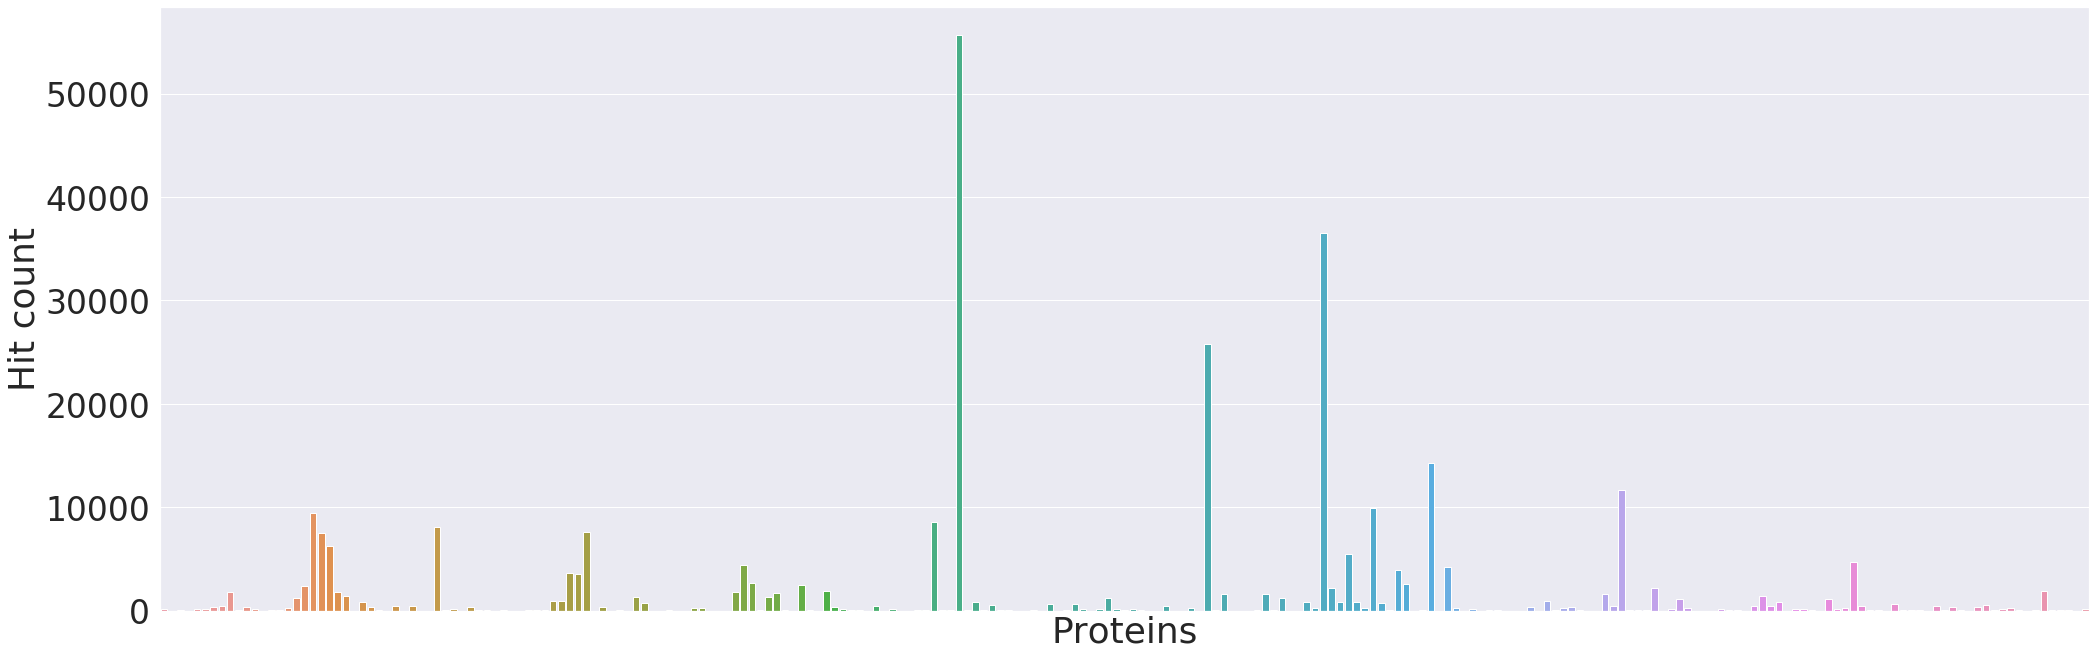

In [59]:
plt.figure(figsize=(30, 10))
ax = sns.barplot('protein', 'count', data=hd)
sns.set(font_scale=3)
ax.set_xlabel('Proteins')
ax.set_ylabel('Hit count')
ax.set_xticks([])
# plt.xticks(rotation=90)
# plt.rc('xtick', labelsize = 16 )
# plt.rc('ytick', labelsize = 16)
# plt.rcParams["axes.labelsize"] = 16
plt.tight_layout()
plt.savefig('enamine_hits', dpi=300)
plt.show()

In [52]:
# plt.figure(figsize=(15, 10))
# ax = hit_count.hist()
# ax.set_xlabel('Protein')
# ax.set_ylabel('Count')
# plt.show()